In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore') 


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum() 

np.int64(0)

In [10]:
df['CustomerID'].unique() 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
df1 = df.drop('CustomerID', axis=1) 

In [12]:
df1['Gender'].replace({'Male':1 , 'Female':0}, inplace=True) 

In [13]:
df1.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


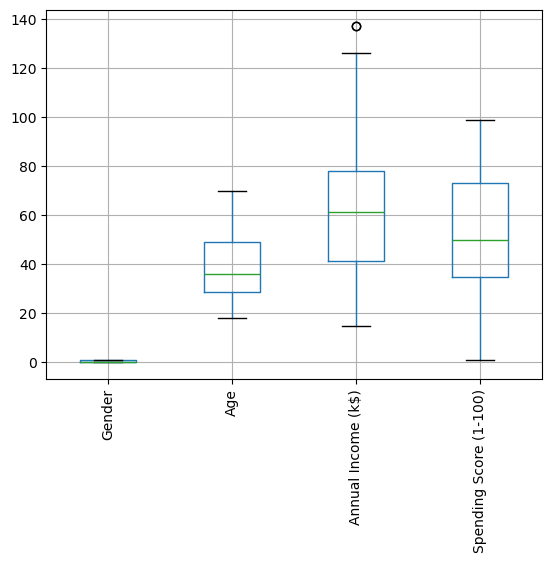

In [15]:
df1.boxplot()
plt.xticks(rotation=90)
plt.show() 

In [16]:
x = df1[['Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
from sklearn.cluster import KMeans 

ssd =[] 

for k in range(1,11): 
    km= KMeans(n_clusters=k, random_state=42) 
    km.fit(x) 
    ssd.append(km.inertia_) 

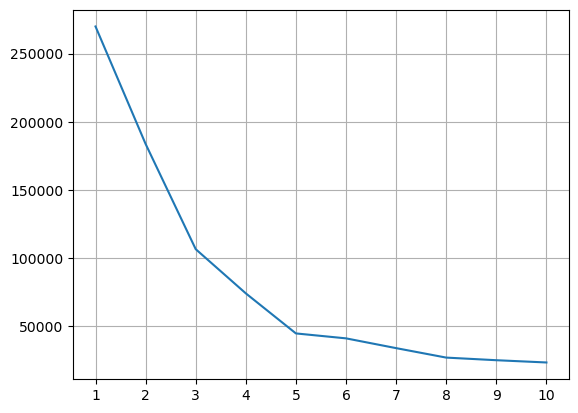

In [18]:
plt.plot(range(1,11), ssd, label='Elbow Line') 
plt.xticks(list(range(1,11))) 
plt.grid() 
plt.show() 

In [19]:
#K=5 

kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(x) 

KMeans(n_clusters=5, random_state=42)

In [20]:
pred = kmeans.predict(x) 
pred 

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [21]:
kmeans.cluster_centers_ 

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

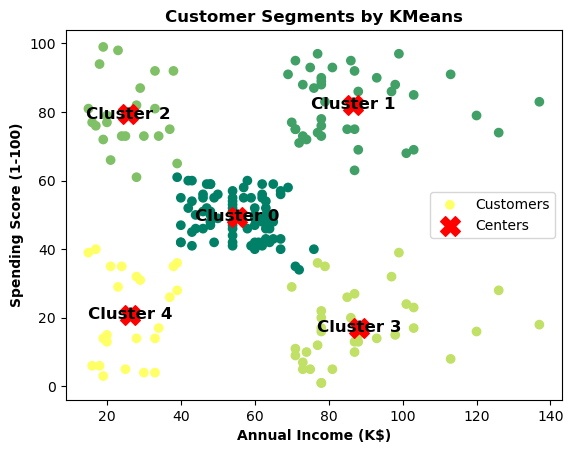

In [42]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=pred, cmap='summer', label='Customers') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centers') 


for i, (x_center, y_center) in enumerate(kmeans.cluster_centers_):
    plt.text(x_center, y_center, f'Cluster {i}', 
             c='black', fontweight='bold', fontsize=12, ha='center', va='center')

plt.title('Customer Segments by KMeans', fontweight='bold') 
plt.xlabel('Annual Income (K$)', fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontweight='bold') 
plt.legend()
plt.show() 

In [43]:
x.head(1)

,Annual Income (k$),Spending Score (1-100)
0,15,39


In [52]:
new_data = [200, 100]

new_data = np.array(new_data).reshape(1,-1)
prediction = kmeans.predict(new_data) 

if prediction ==1:
    print( 'Customer belongs to Cluster 1' )
elif prediction == 2:
    print( 'Customer belongs to Cluster 2' )
elif prediction == 3:
    print( 'Customer belongs to Cluster 3' )
else: 
    print( 'Customer belongs to Cluster 4' )


Customer belongs to Cluster 1


In [53]:
new_data = [15, 39]

new_data = np.array(new_data).reshape(1,-1)
prediction = kmeans.predict(new_data) 

if prediction ==1:
    print( 'Customer belongs to Cluster 1' )
elif prediction == 2:
    print( 'Customer belongs to Cluster 2' )
elif prediction == 3:
    print( 'Customer belongs to Cluster 3' )
else: 
    print( 'Customer belongs to Cluster 4' )


Customer belongs to Cluster 4


In [54]:
import pickle 

with open('CustomersWithKmeans.pkl', 'wb') as f: 
    pickle.dump(kmeans, f)